<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/22_First_project_skill_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


fig, ax = plt.subplots(rows,columns)

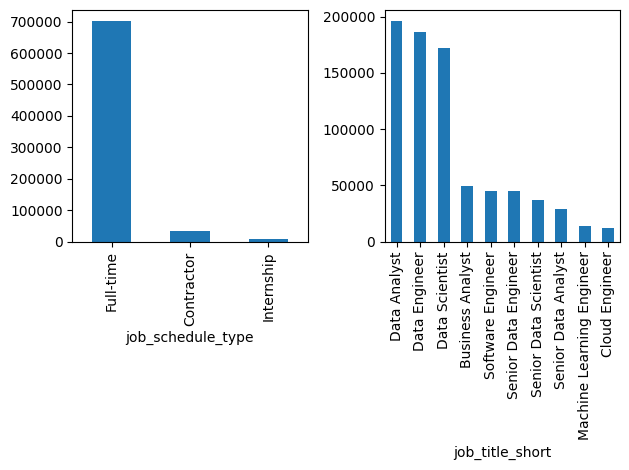

In [ ]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()
plt.show()

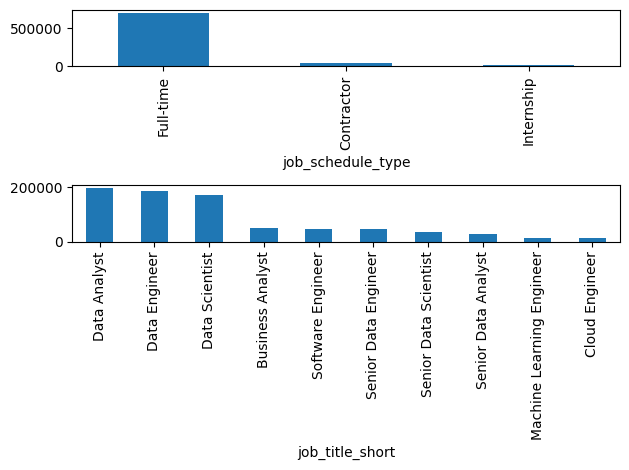

In [ ]:
fig, ax = plt.subplots(2,1)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()
plt.show()

In [ ]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 

Creating a subplot that displays individual bar charts for each `job_title_short` from the DataFrame we created in `11_Pandas_Explode`.

In [ ]:
# df_Ireland=df.copy()
df_Ireland = df[df['job_country']=='Ireland'].copy()
df_Ireland = df_Ireland.explode('job_skills')
df_Ireland = df_Ireland.groupby(['job_skills', 'job_title_short']).size()
df_Ireland = df_Ireland.reset_index(name='skill_count')
df_Ireland.sort_values(by='skill_count', ascending=False, inplace=True)
df_Ireland

,job_skills,job_title_short,skill_count
1019,sql,Data Analyst,1227
1020,sql,Data Engineer,1024
792,python,Data Engineer,956
285,excel,Data Analyst,919
793,python,Data Scientist,759
...,...,...,...
205,dart,Data Scientist,1
560,matlab,Senior Data Engineer,1
204,dart,Data Engineer,1
563,matplotlib,Business Analyst,1


In [ ]:
job_titles = df_Ireland['job_title_short'].unique().tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Software Engineer',
 'Business Analyst',
 'Senior Data Analyst',
 'Senior Data Scientist',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [ ]:
job_titles = job_titles[:3]

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [ ]:
type(job_titles)

list

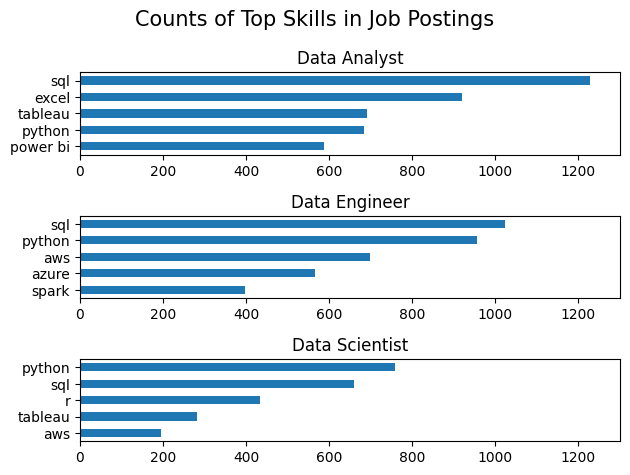

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_Ireland[df_Ireland['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 1300) # make the scales the same

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap
plt.show()

In [ ]:
plt.savefig('top_skills.png')

plt.show()

<Figure size 640x480 with 0 Axes>

# **Percentage**

In [ ]:
df_Ireland2= df[df['job_country']=='Ireland']['job_title_short'].value_counts().reset_index(name='jobs_total')
df_Ireland2

,job_title_short,jobs_total
0,Data Analyst,2756
1,Data Engineer,1925
2,Data Scientist,1435
3,Software Engineer,1365
4,Business Analyst,1064
5,Senior Data Engineer,811
6,Senior Data Analyst,641
7,Senior Data Scientist,549
8,Cloud Engineer,360
9,Machine Learning Engineer,256


In [ ]:
df_percentage = pd.merge(df_Ireland, df_Ireland2, how= 'left' , on='job_title_short')
df_percentage['skill_percent']= 100*df_percentage['skill_count']/df_percentage['jobs_total']
df_percentage

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,1227,2756,44.521045
1,sql,Data Engineer,1024,1925,53.194805
2,python,Data Engineer,956,1925,49.662338
3,excel,Data Analyst,919,2756,33.345428
4,python,Data Scientist,759,1435,52.891986
...,...,...,...,...,...
1218,dart,Data Scientist,1,1435,0.069686
1219,matlab,Senior Data Engineer,1,811,0.123305
1220,dart,Data Engineer,1,1925,0.051948
1221,matplotlib,Business Analyst,1,1064,0.093985


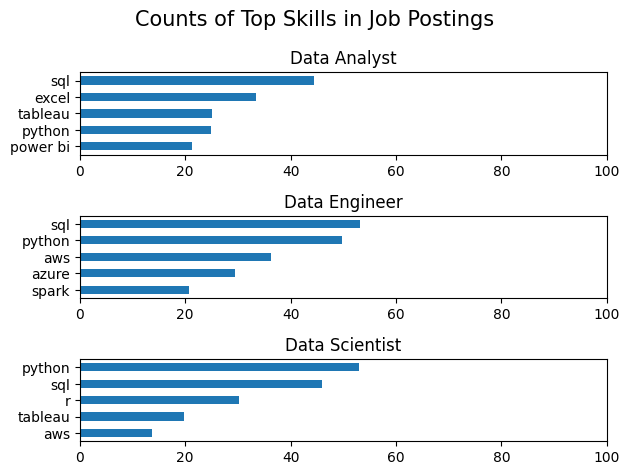

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_percentage[df_percentage['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100) # make the scales the same

# اگر خواستی درصد هارو روی نمودار بندازی برو از توی گیت هاب پروژه ببین


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap
plt.show()